In [1]:
from modules import node, bandits, system
from modules import utils
from configs import config

import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
# Load data
with open('../data/channel_data_round_1.pickle', 'rb') as fp:
    dataset_1 = pickle.load(fp)

# with open('../data/channel_data_round_2.pickle', 'rb') as fp:
#     dataset_2 = pickle.load(fp)

# with open('../data/channel_data_round_3.pickle', 'rb') as fp:
#     dataset_3 = pickle.load(fp)

# Create the channel and location data
H_1, loc_1 = utils.craft_data(dataset_1)
# H_2, loc_2 = utils.craft_data(dataset_2)
# H_3, loc_3 = utils.craft_data(dataset_3)

# concatenate the data
H = np.concatenate([H_1], axis=0)
loc = np.concatenate([loc_1], axis=0)

Before discarding zero data:  (8065, 4, 16) (8065, 2)
After discarding zero data:  (7992, 4, 16) (7992, 2)


In [3]:
# System configuration
# BS: 16 antennas and codebook size of 8
N_b = 16
M_b = 8

# UE: 4 antennas and codebook size of 4
N_u = 4
M_u = 4

# Location of BS
x_bs = dataset_1[0]['basestation']['location'][0][0]
y_bs = dataset_1[0]['basestation']['location'][0][1]

# Only the BS 5 is selected from the DeepMIMO dataset
BS = node.TRANSCEIVER(x=x_bs, y=y_bs, N=N_b, P=config.P_BS, M=M_b)
BS.construct_DFT_codebook(q=3)

UE = node.TRANSCEIVER(x=None, y=None, N=N_u, P=None, M=M_u)
UE.construct_DFT_codebook(q=3)

s = system.System(BS=BS, UE=UE, H=H, loc=loc)

In [4]:
lin_ucb = s.calc_SE_using_LinUCB(delta=0.01)
average_lin_ucb = s.calc_average_SE(lin_ucb, w=100)

t = 0: pull arm 0, receive reward 0.17506086821339586
t = 1: pull arm 1, receive reward 3.514392780620423e-05
t = 2: pull arm 2, receive reward 0.4745546895351792
t = 3: pull arm 3, receive reward 0.0004985358647671559
t = 4: pull arm 4, receive reward 0.00012861050561522558
t = 5: pull arm 5, receive reward 7.002772346210658e-06
t = 6: pull arm 6, receive reward 0.15733743724290664
t = 7: pull arm 7, receive reward 0.00046436624047168105
t = 8: pull arm 8, receive reward 0.032834132842672184
t = 9: pull arm 9, receive reward 0.0023791739077634075
t = 10: pull arm 10, receive reward 0.5842445838556632
t = 11: pull arm 11, receive reward 0.004933171423796525
t = 12: pull arm 12, receive reward 0.0011400431395159956
t = 13: pull arm 13, receive reward 1.306127525789337e-07
t = 14: pull arm 14, receive reward 0.2114331116813549
t = 15: pull arm 15, receive reward 0.0010003241126013153
t = 16: pull arm 16, receive reward 0.3770847610783499
t = 17: pull arm 17, receive reward 0.006614174445

In [5]:
optimal_SE = s.calc_optimal_SE()
average_optimal_SE = s.calc_average_SE(optimal_SE, w=100)

In [6]:
# ucb_1 = s.calc_SE_using_UCB(c=1)
# average_ucb_1 = s.calc_average_SE(ucb_1, w=100)

ucb_5 = s.calc_SE_using_UCB(c=5)
average_ucb_5 = s.calc_average_SE(ucb_5, w=100)

# ucb_10 = s.calc_SE_using_UCB(c=10)
# average_ucb_10 = s.calc_average_SE(ucb_10, w=100)

t = 0: pull arm 0, receive reward 0.052476483131261034
t = 1: pull arm 1, receive reward 0.0005646777580373204
t = 2: pull arm 2, receive reward 0.6852425218493062
t = 3: pull arm 3, receive reward 0.00017976550022896383
t = 4: pull arm 4, receive reward 0.00010320050836747075
t = 5: pull arm 5, receive reward 8.996772242932127e-06
t = 6: pull arm 6, receive reward 0.04866203990012171
t = 7: pull arm 7, receive reward 0.0001357520381873602
t = 8: pull arm 8, receive reward 0.024282148606649016
t = 9: pull arm 9, receive reward 0.0009881232362920743
t = 10: pull arm 10, receive reward 0.8958623444788407
t = 11: pull arm 11, receive reward 0.0020983577820040344
t = 12: pull arm 12, receive reward 0.0015656001726846054
t = 13: pull arm 13, receive reward 6.298040736666107e-08
t = 14: pull arm 14, receive reward 3.4999344954554794
t = 15: pull arm 15, receive reward 0.00023324059583633403
t = 16: pull arm 16, receive reward 0.21694741920494595
t = 17: pull arm 17, receive reward 0.09571889

In [7]:
# Setup for figure size
plt.figure(figsize=(3.5, 2.625), dpi=500)

#Font setup
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 8
plt.rcParams['legend.fontsize'] = 8

#Setup for tick and axes and more
plt.rcParams['xtick.minor.visible'] = False
plt.rcParams['ytick.minor.visible'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = 0.4
plt.rcParams['ytick.major.width'] = 0.4
plt.rcParams['axes.linewidth'] = 0.4

<Figure size 1750x1312.5 with 0 Axes>

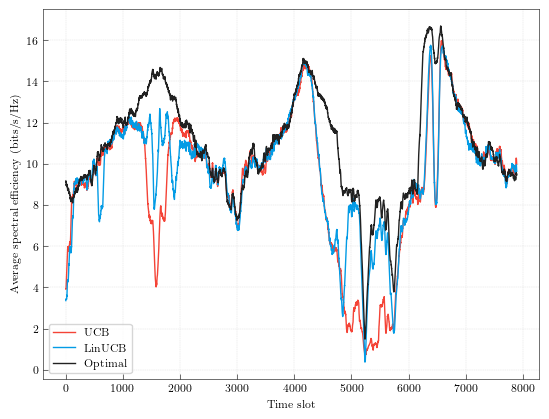

In [8]:
plt.plot(average_ucb_5, color='#F44336', linewidth='1', label='UCB')
plt.plot(average_lin_ucb, color='#039BE5', linewidth='1', label='LinUCB')
plt.plot(average_optimal_SE, color='#212121', linewidth='1', label='Optimal')

plt.legend(loc='lower left')
plt.xlabel('Time slot')
plt.ylabel('Average spectral efficiency (bits/s/Hz)')
plt.grid(color='gainsboro', linestyle='--', linewidth=0.3)


plt.savefig("real_time_benchmark.pdf")
plt.show()

In [9]:
print(np.mean(optimal_SE), np.mean(lin_ucb), np.mean(ucb_5))

10.862420610088705 9.652073404900705 9.21210123281821


In [10]:
def cdf(arr: np.array) -> list:
    
    x = range(25)
    prob = [np.sum(arr < val)/len(arr) for val in x]

    return x, prob

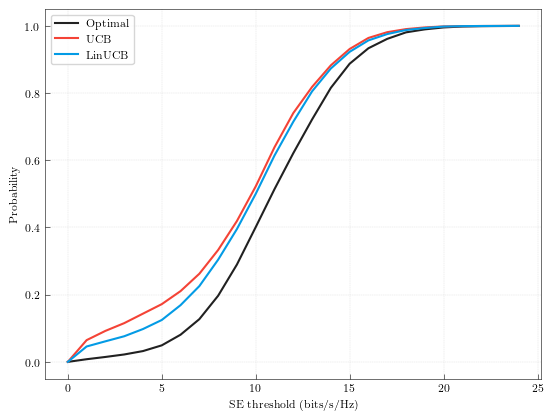

In [11]:
x_optimal, prob_optimal = cdf(optimal_SE)

x_ucb, prob_ucb = cdf(ucb_5)

x_lin_ucb, prob_lin_ucb = cdf(lin_ucb)

plt.plot(x_optimal, prob_optimal, label='Optimal', color='#212121')
plt.plot(x_ucb, prob_ucb, label='UCB', color='#F44336')
plt.plot(x_lin_ucb, prob_lin_ucb, label='LinUCB', color='#039BE5')

plt.xlabel('SE threshold (bits/s/Hz)')
plt.ylabel('Probability')

plt.grid(color='gainsboro', linestyle='--', linewidth=0.3)
plt.legend()
plt.savefig("CDF.pdf")
plt.show()